In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp

In [11]:
dataset = pd.read_csv("/content/drive/MyDrive/Research/dataset.csv")
dataset.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


# Step 2: Data Cleaning

In [12]:
# Check for missing values
missing_values = dataset.isnull().sum()

# Handle missing values by filling with the mean
mean_fill = dataset.mean(numeric_only=True)
dataset.fillna(mean_fill, inplace=True)

In [13]:
# Check for duplicates
duplicates = dataset.duplicated()

# Remove duplicate rows
dataset = dataset[~duplicates]


# Step 3: Handle Outliers

In [14]:
from scipy import stats

# Define a Z-score threshold for outliers
z_threshold = 3

# Compute the Z-scores for numeric columns
z_scores = stats.zscore(dataset.select_dtypes(include=['float64']))

# Identify and remove outliers
outlier_indices = (z_scores > z_threshold).any(axis=1)
dataset = dataset[~outlier_indices]

In [15]:
print(dataset.columns)

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


# Step 4: Define Features and Target

In [16]:
# Define your feature set and target variable using the correct column name
X = dataset.drop('Type', axis=1)
y = dataset['Type']

In [17]:
# Define a Z-score threshold for outliers
z_threshold = 3

# Compute the Z-scores for numeric columns
z_scores = stats.zscore(dataset.select_dtypes(include=['float64']))

# Identify and remove outliers
outlier_indices = (z_scores > z_threshold).any(axis=1)
dataset = dataset[~outlier_indices]

# Step 5: Split the Data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
unseen_labels = set(y_test) - set(y_train)
print("Unseen labels in testing data:", unseen_labels)

Unseen labels in testing data: set()


In [20]:
unseen_label_indices = y_test.isin(unseen_labels)
X_test = X_test[~unseen_label_indices]
y_test = y_test[~unseen_label_indices]

# Step 6: Label Encoding (if applicable)

In [21]:
from sklearn.preprocessing import LabelEncoder

# Define the label encoder for the target variable
label_encoder = LabelEncoder()

# Fit the label encoder on the training data
label_encoder.fit(y_train)

# Reverse label encoding on the testing data
y_test_original = label_encoder.inverse_transform(y_test)


In [22]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [23]:
from scipy.sparse import csr_matrix

In [24]:
categorical_columns = ['APP_BYTES', 'APP_PACKETS', 'CONTENT_LENGTH', 'DIST_REMOTE_TCP_PORT', 'DNS_QUERY_TIMES', ...]
# Get the column names of the training data
training_columns = X_train.columns

# Check if any of the categorical columns are missing in the training data
missing_columns = set(categorical_columns) - set(training_columns)

# If any of the categorical columns are missing, add them to the training data
if missing_columns:
    for column in missing_columns:
        X_train[column] = pd.Series(dtype='object')

# Step 7: Categorical Feature Handling (if applicable)

In [25]:
# Define the categorical columns
categorical_columns = ['APP_BYTES', 'APP_PACKETS', 'CONTENT_LENGTH', 'DIST_REMOTE_TCP_PORT', 'DNS_QUERY_TIMES', ...]


In [26]:
print(X_test.columns)

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES'],
      dtype='object')


In [27]:
import pandas as pd

# Get the column names of the test data
test_columns = X_test.columns

# Check if any of the categorical columns are missing in the test data
missing_columns = set(categorical_columns) - set(test_columns)

# If any of the categorical columns are missing, add them to the test data
if missing_columns:
    for column in missing_columns:
        X_test[column] = pd.Series(dtype='object')

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix

# Define the categorical columns
categorical_columns = ['APP_BYTES', 'APP_PACKETS', 'CONTENT_LENGTH', 'DIST_REMOTE_TCP_PORT', 'DNS_QUERY_TIMES', '...']

# Check if any of the categorical columns are missing in the training data
missing_training_columns = set(categorical_columns) - set(X_train.columns)

# If any of the categorical columns are missing, add them to the training data
if missing_training_columns:
    for column in missing_training_columns:
        X_train[column] = pd.Series(dtype='object')

# Check if any of the categorical columns are missing in the test data
missing_test_columns = set(categorical_columns) - set(X_test.columns)

# If any of the categorical columns are missing, add them to the test data
if missing_test_columns:
    for column in missing_test_columns:
        X_test[column] = pd.Series(dtype='object')

# Create the OneHotEncoder object
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the OneHotEncoder object to the training data
one_hot_encoder.fit(X_train[categorical_columns])

# Transform the training and test data using the fitted OneHotEncoder object
X_train_encoded = one_hot_encoder.transform(X_train[categorical_columns])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_columns])

# Check if the OneHotEncoder object returned a sparse matrix
if isinstance(X_test_encoded, csr_matrix):
    # Convert the sparse matrix to a dense matrix
    X_test_encoded = X_test_encoded.todense()


# Step 8: Model Training

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train_encoded, y_train)


RandomForestClassifier()


# Step 9: Model Performance Evaluation

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the testing data
y_pred = model.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate ROC-AUC score (if your problem is binary classification)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_encoded)[:,1])
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.9031339031339032
Precision: 0.9375
Recall: 0.3125
F1 Score: 0.46875
ROC-AUC Score: 0.8782315731573156


In [31]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create an ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_encoded)[:,1])
roc_auc = auc(fpr, tpr)
print("ROC-AUC:", roc_auc)

# Create a precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_encoded)[:,1])

Confusion Matrix:
[[302   1]
 [ 33  15]]
ROC-AUC: 0.8782315731573156


In [32]:
# Handle missing values in X_test
X_test.fillna(mean_fill, inplace=True)  # Use the same mean_fill object as with X_train

# Encode categorical columns in X_test using the same one-hot encoder
X_test_encoded = one_hot_encoder.transform(X_test[categorical_columns])  # Use the same one-hot encoder as with X_train

# Check if the OneHotEncoder object returned a sparse matrix
if isinstance(X_test_encoded, csr_matrix):
    # Convert the sparse matrix to a dense matrix
    X_test_encoded = X_test_encoded.todense()

# Make predictions on the testing data
y_pred = model.predict_proba(X_test_encoded)[:, 1]

# Calculate ROC curve and AUC as shown earlier


# Step 10: Visualizations

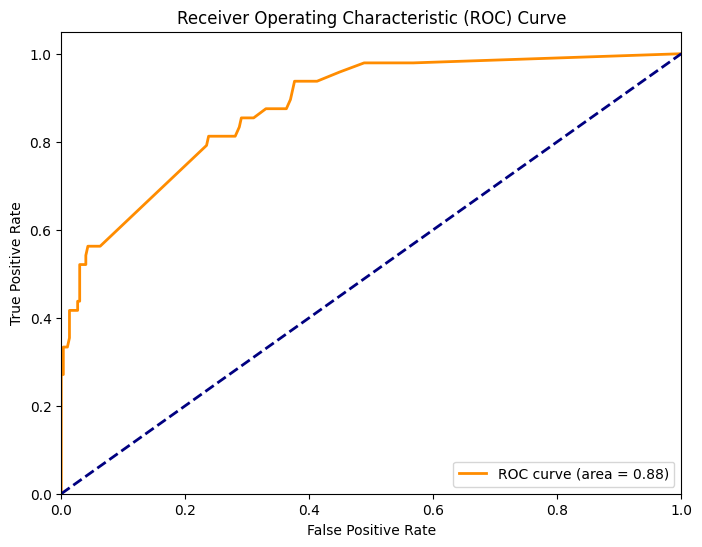

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_original, y_pred)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test_original, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


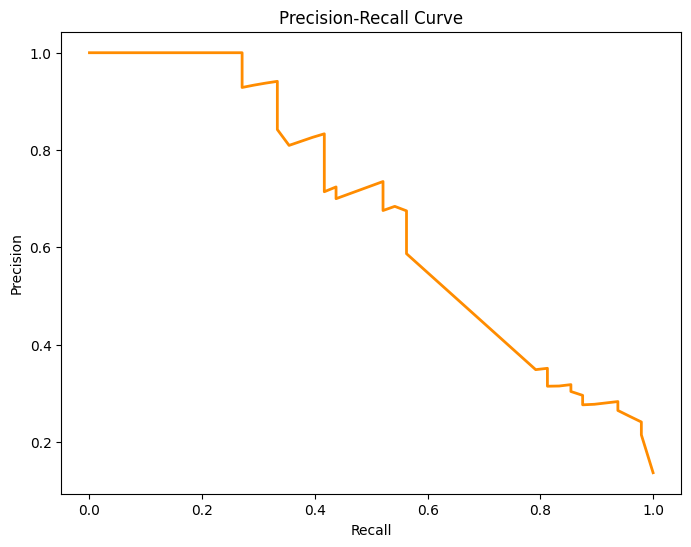

In [34]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_original, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

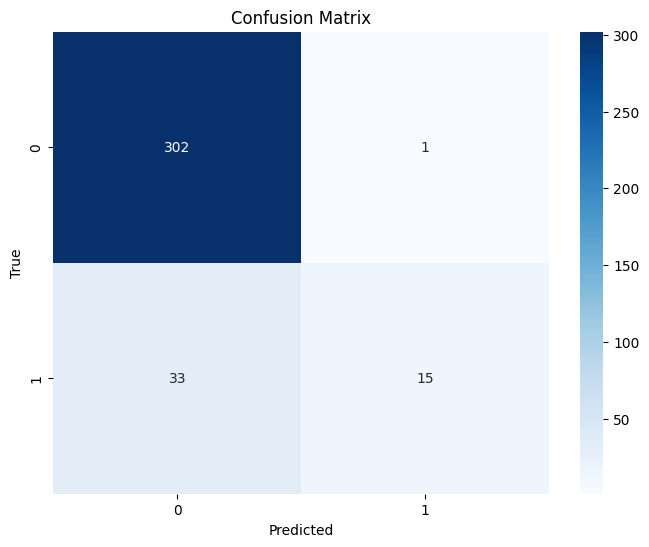

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_original, y_pred > 0.5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


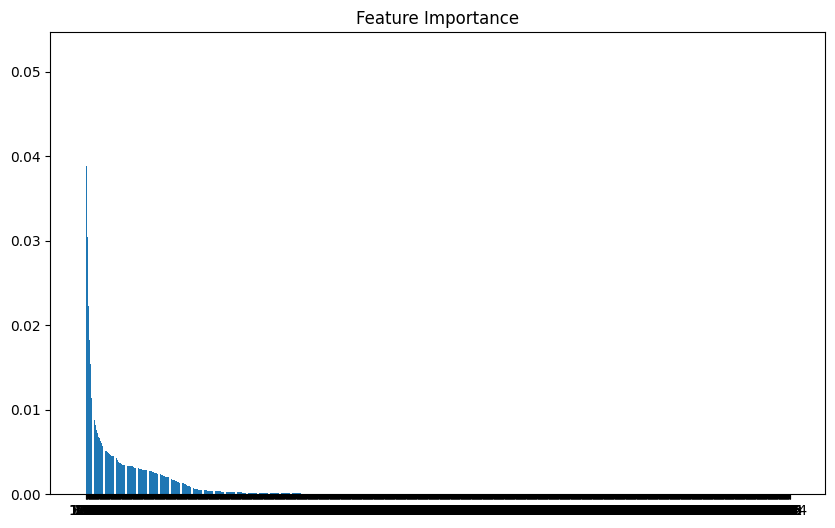

In [36]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train_encoded.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_encoded.shape[1]), indices)
plt.title('Feature Importance')
plt.show()

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Select the features you want to include in clustering
features_for_clustering = dataset[['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'APP_PACKETS', 'DNS_QUERY_TIMES']]

# Apply one-hot encoding to categorical columns if they exist
categorical_columns = ['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']
if any(dataset[column].dtype == 'object' for column in categorical_columns):
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoded_categories = encoder.fit_transform(dataset[categorical_columns])
    features_for_clustering = np.hstack((features_for_clustering, encoded_categories))

# Specify the number of clusters (you can adjust this)
num_clusters = 2  # You can change the number of clusters as needed

# Create a K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the K-Means model to your dataset
kmeans.fit(features_for_clustering)

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Add cluster assignments to your dataset
dataset['Cluster'] = cluster_assignments

# Display the first few rows of the dataset with cluster assignments
print(dataset.head())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
5  B0_2064          18                          7       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx      263.000000          None           None   
1          Apache/2.4.10    15087.000000          None           None   
2  Microsoft-HTTPAPI/2.0      324.000000          None           None   
3                  nginx      162.000000            US             AK   
5                  nginx    11726.927761            SC           Mahe   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  ...  REMOTE_IPS  APP_BYTES  \
0  10/10/2015 18:21               None  ...           2        700   
1              None           

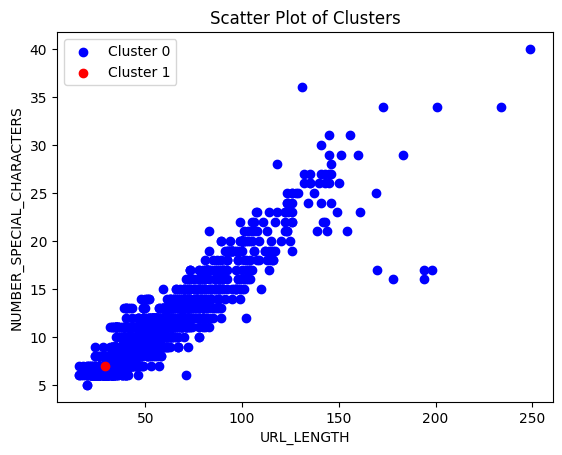

In [39]:
import matplotlib.pyplot as plt

# Scatter plot for Cluster 0
plt.scatter(dataset[dataset['Cluster'] == 0]['URL_LENGTH'], dataset[dataset['Cluster'] == 0]['NUMBER_SPECIAL_CHARACTERS'], label='Cluster 0', c='blue')

# Scatter plot for Cluster 1
plt.scatter(dataset[dataset['Cluster'] == 1]['URL_LENGTH'], dataset[dataset['Cluster'] == 1]['NUMBER_SPECIAL_CHARACTERS'], label='Cluster 1', c='red')

plt.xlabel('URL_LENGTH')
plt.ylabel('NUMBER_SPECIAL_CHARACTERS')
plt.title('Scatter Plot of Clusters')
plt.legend()
plt.show()


In [40]:
# Calculate statistics for Cluster 0
cluster_0_stats = dataset[dataset['Cluster'] == 0].describe()

# Calculate statistics for Cluster 1
cluster_1_stats = dataset[dataset['Cluster'] == 1].describe()

print("Cluster 0 Statistics:")
print(cluster_0_stats)

print("\nCluster 1 Statistics:")
print(cluster_1_stats)

Cluster 0 Statistics:
        URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
count  1709.000000                1709.000000     1709.000000   
mean     56.861908                  11.090111     8789.701786   
std      27.553582                   4.510469     7028.731612   
min      16.000000                   5.000000        0.000000   
25%      39.000000                   8.000000     1182.000000   
50%      49.000000                  10.000000    11726.927761   
75%      68.000000                  12.000000    11726.927761   
max     249.000000                  40.000000    40605.000000   

       TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT   REMOTE_IPS  \
count                1709.000000           1709.000000  1709.000000   
mean                   14.968988              4.791106     3.029842   
std                    36.002971             13.718362     3.377106   
min                     0.000000              0.000000     0.000000   
25%                     0.000000     

In [41]:
# Extract the data point in Cluster 1
cluster_1_data = dataset[dataset['Cluster'] == 1]

# Calculate statistics for Cluster 1
cluster_1_statistics = cluster_1_data.describe()

# Display the statistics
print("Cluster 1 Statistics:")
print(cluster_1_statistics)

Cluster 1 Statistics:
       URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
count         1.0                        1.0        1.000000   
mean         29.0                        7.0    11726.927761   
std           NaN                        NaN             NaN   
min          29.0                        7.0    11726.927761   
25%          29.0                        7.0    11726.927761   
50%          29.0                        7.0    11726.927761   
75%          29.0                        7.0    11726.927761   
max          29.0                        7.0    11726.927761   

       TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
count                        1.0                   1.0         1.0        1.0   
mean                       709.0                 708.0         3.0  2362906.0   
std                          NaN                   NaN         NaN        NaN   
min                        709.0                 708.0         3.0  2362906.0

Feature ranking:
1. Feature WHOIS_REGDATE_17/09/2008 0:00: 0.09072138370238085
2. Feature WHOIS_COUNTRY_ES: 0.06372117045799879
3. Feature WHOIS_UPDATED_DATE_2/09/2016 0:00: 0.039842887500287666
4. Feature WHOIS_STATEPRO_Barcelona: 0.03866775347857107
5. Feature WHOIS_UPDATED_DATE_None: 0.03676578590002567
6. Feature SERVER_nginx: 0.03351975677104645
7. Feature WHOIS_REGDATE_None: 0.024115787096698846
8. Feature SERVER_Microsoft-IIS/6.0: 0.017955631745495096
9. Feature WHOIS_COUNTRY_US: 0.0174544583396156
10. Feature WHOIS_STATEPRO_Utah: 0.016907130912752588
11. Feature CONTENT_LENGTH: 0.016682110639314497
12. Feature DNS_QUERY_TIMES: 0.016588148892288414
13. Feature SERVER_Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL/0.9.8y DAV/2 PHP/5.2.12 with Suhosin-Patch: 0.015301758794475628
14. Feature CHARSET_UTF-8: 0.014972280461188332
15. Feature SERVER_Apache: 0.014440926508215643
16. Feature WHOIS_REGDATE_18/06/2003 0:00: 0.01413141042283917
17. Feature WHOIS_UPDATED_DATE_14/06/2016 0:00

<ipython-input-54-dbfb1601f6c0>:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


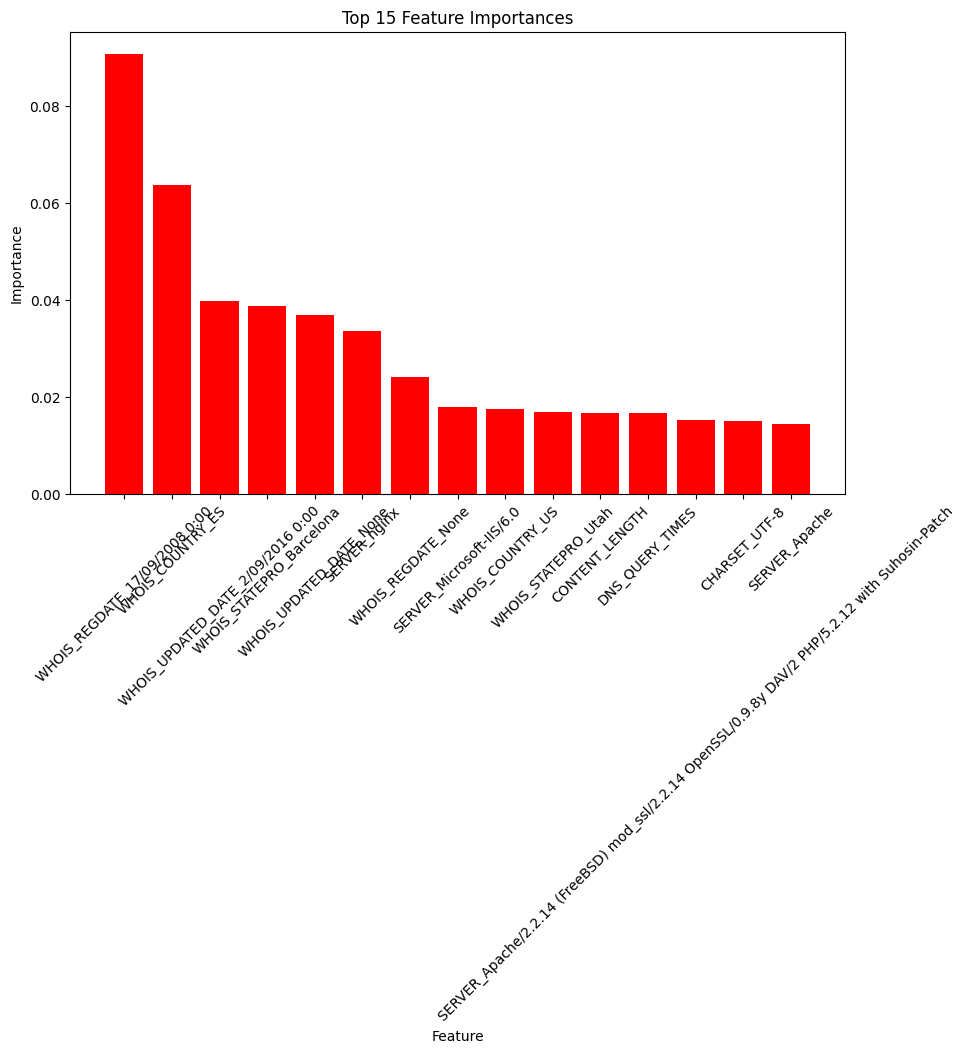

In [54]:
# Perform one-hot encoding for categorical columns
dataset_encoded = pd.get_dummies(dataset, columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'])

# Exclude non-numeric columns
X_numeric = dataset_encoded.drop(columns=['URL', 'Type', 'Cluster'])

# Define the target variable (in this case, 'Type')
y = dataset_encoded['Type']

# Build a forest and compute feature importances
forest = ExtraTreesClassifier(n_estimators=100, random_state=0)
forest.fit(X_numeric, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Sort and get indices of feature importances
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_numeric.shape[1]):
    print(f"{f + 1}. Feature {X_numeric.columns[indices[f]]}: {importances[indices[f]]}")
# Extract feature names and importances
feature_names = X_numeric.columns
importances = forest.feature_importances_

# Sort and get indices of feature importances
indices = np.argsort(importances)[::-1]

# Select the top N most important features to display
top_n = 15

# Plot the top N feature importances
plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importances".format(top_n))
plt.bar(range(top_n), importances[indices][:top_n], color="r", align="center")
plt.xticks(range(top_n), [feature_names[i] for i in indices][:top_n], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
